<a href="https://colab.research.google.com/github/dssunidhi/LeadScore/blob/main/SalaryPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Salary Prediction##
####step1-
import Necessary Packages

In [ ]:
#numerical opearation
import numpy as np
#working with dataframe
import pandas as pd
#working with visualzation
import seaborn as sns
import matplotlib.pyplot as plt
#for splitting data
from sklearn.model_selection import train_test_split
#for linear regression modeling
from sklearn.linear_model import LinearRegression
#calculating model performance
from sklearn.metrics import r2_score


####step2-
import Dataset

In [ ]:
df=pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
#Drop Unecessary columns
# List of column names to drop
columns_to_drop = ['Education Level', 'Job Title','Gender']
df = df.drop(columns_to_drop, axis=1)


In [ ]:
df

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0
...,...,...,...
370,35.0,8.0,85000.0
371,43.0,19.0,170000.0
372,29.0,2.0,40000.0
373,34.0,7.0,90000.0


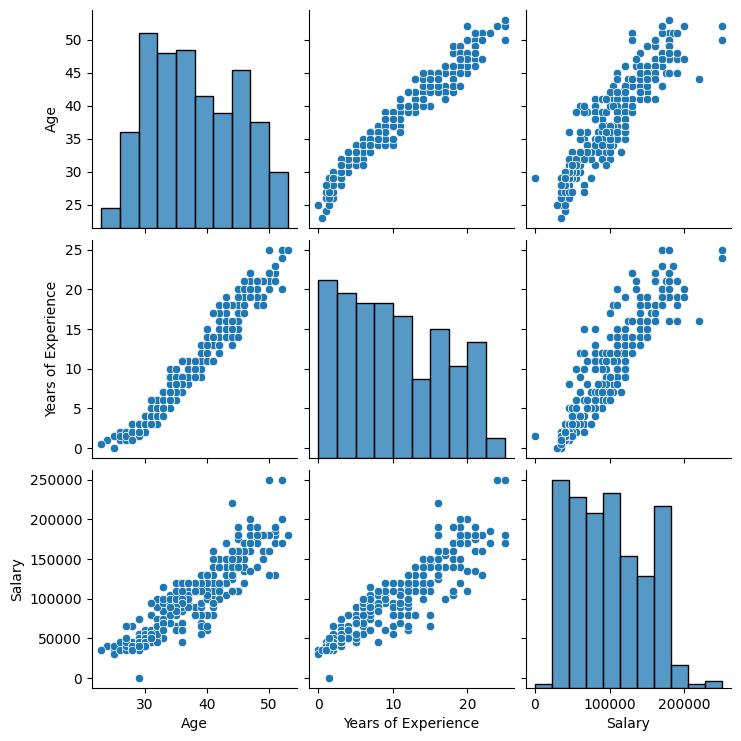

In [ ]:
#shows reltionship between varible
sns.pairplot(df)


####Step-3####
Not need of this bcoz all values in numrical format which is understand by machine

####Step-4####
identify X and Y varible

In [ ]:
#Drop nan values
df= df.dropna()


In [ ]:
y = df[['Salary']].values
x = df.drop(['Salary'], axis=1).values

In [ ]:
y = pd.DataFrame(y, columns=['Salary'])
# Convert x to DataFrame
x= pd.DataFrame(x, columns=df.columns.drop('Salary'))

In [ ]:
x

,Age,Years of Experience
0,32.0,5.0
1,28.0,3.0
2,45.0,15.0
3,36.0,7.0
4,52.0,20.0
...,...,...
368,35.0,8.0
369,43.0,19.0
370,29.0,2.0
371,34.0,7.0


In [ ]:
y

,Salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
368,85000.0
369,170000.0
370,40000.0
371,90000.0


###Step-5###
###Split data into train data and test data###
x_train-trained data set of independent varible
y-train-trained data set of dependent varible
x_test-testing data set of independent varible
y_test-testing data set of dependent varible

This code splits the data into training and testing sets for both features (x) and target (y) variables, with 80% of the data used for training (x_train, y_train) and 20% for testing (x_test, y_test), while ensuring reproducibility with random_state=0

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)
x_train,x_test,y_train,y_test


(      Age  Years of Experience
 340  31.0                  3.0
 122  33.0                  5.0
 212  35.0                  8.0
 63   47.0                 21.0
 135  39.0                 10.0
 ..    ...                  ...
 323  36.0                  9.0
 192  34.0                  7.0
 117  48.0                 20.0
 47   45.0                 16.0
 172  43.0                 16.0
 
 [298 rows x 2 columns],
       Age  Years of Experience
 45   28.0                  2.0
 272  30.0                  2.0
 54   29.0                  3.0
 236  45.0                 16.0
 253  35.0                  8.0
 ..    ...                  ...
 56   27.0                  2.0
 8    26.0                  1.0
 198  35.0                  9.0
 308  29.0                  1.5
 78   48.0                 20.0
 
 [75 rows x 2 columns],
        Salary
 340   50000.0
 122   50000.0
 212   85000.0
 63   180000.0
 135   55000.0
 ..        ...
 323  100000.0
 192   95000.0
 117  170000.0
 47   180000.0
 172  140000.0

###Step-6###
###define and train linear regression model using training data###
code defines a Linear Regression model (LR) and trains it using the training data (x_train and y_train) to learn the relationship between the independent and dependent variables.

In [ ]:
#define linear regression
LR=LinearRegression()
#train linera regression model using x and y varible i.e indepebdent and dependent varibles
LR.fit(x_train,y_train)

LinearRegression()

###Step-7###
###test data###
compare the predicte and actual values

In [ ]:
y_predict=LR.predict(x_test)
print(y_predict)
print(y_test)

[[ 43124.8527201 ]
 [ 47005.42758627]
 [ 49921.08665575]
 [144092.99011844]
 [ 85842.54376708]
 [142152.70268535]
 [ 60597.89545757]
 [128560.23481406]
 [ 43124.8527201 ]
 [180014.44722977]
 [ 67394.12939322]
 [114967.76694276]
 [137296.75618279]
 [ 80986.59726451]
 [102350.67070786]
 [ 62538.18289065]
 [ 51861.37408883]
 [ 43124.8527201 ]
 [138272.12781918]
 [173218.21329412]
 [ 83902.25633399]
 [ 87782.83120016]
 [103315.58650455]
 [ 45065.14015318]
 [189726.3402349 ]
 [ 47005.42758627]
 [ 63513.55452705]
 [ 67394.12939322]
 [118848.34180893]
 [ 47980.79922266]
 [ 69334.4168263 ]
 [114967.76694276]
 [114967.76694276]
 [135356.46874971]
 [ 51861.37408883]
 [114967.76694276]
 [ 49921.08665575]
 [104290.95814094]
 [101375.29907146]
 [114967.76694276]
 [128560.23481406]
 [166421.97935847]
 [142152.70268535]
 [169337.63842795]
 [162541.4044923 ]
 [ 45065.14015318]
 [ 68369.50102961]
 [149924.3082574 ]
 [ 58657.60802448]
 [ 83902.25633399]
 [ 96519.3525689 ]
 [ 90698.49026964]
 [ 77106.022

###Step-7###
###determine the performance of model using suitable metric###
calculate model performance

In [ ]:
print('coefficient of determination:%.3f' % r2_score(y_test,y_predict))

0.8966472668904082

####intecept_line=mean(y)-coefficient_of_determination*mean(x)####

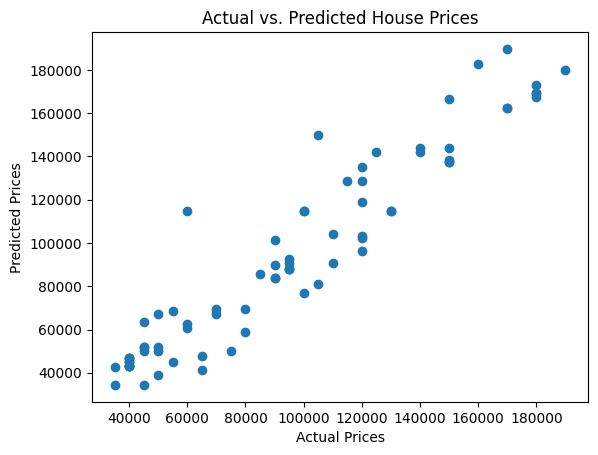

In [ ]:
# Plot predicted vs. actual values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()